In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
DATADIR='/Users/sukhveersingh/Desktop/final_year/final_year/Hand-written-text-recognizer-master/training_set'
CATEGORIES=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
#         print(os.path.join(path,img))
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#         if(category == 'G'):
#             plt.imshow(img_array,cmap='gray')
#             plt.show()


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
training_data=[]
DATADIR='/Users/sukhveersingh/Desktop/final_year/final_year/Hand-written-text-recognizer-master/training_set'
CATEGORIES=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ret,thresh=cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
#                 plt.imshow(img_array,cmap='gray')
#                 plt.show()
                training_data.append([thresh,class_num])
            except Exception as e:
                pass
create_training_data()
# print(len(training_data))
# print(training_data[7699])
# print(training_data[7699][1])
cv2.waitKey(0)
cv2.destroyAllWindows()

# density of individual character

In [13]:
import matplotlib.pyplot as plt
density_all=[]
# count=0
for i in training_data:
#     count+=1
#     if(count==1):
#         plt.imshow(i[0],cmap='gray')
#         plt.show()
    rows,cols=i[0].shape
    
    density=[]
    r=0
    for j in range(3):
        c=0
        for k in range(3):
            patch=i[0][r:r+10,c:c+10]
#             if count==1:
#                 print(patch)
            dark=0
            for l in patch:
                for m in l:
                    if(m==255):
                        dark+=1
            density.append(dark/(rows//3*cols//3))
            c+=10
        r+=10
    density_all.append([density,i[1]])
print(density_all[0:3])           
                

[[[0.24, 0.39, 0.0, 0.61, 0.28, 0.29, 0.19, 0.03, 0.23], 0], [[0.47, 0.27, 0.0, 0.68, 0.32, 0.26, 0.54, 0.0, 0.32], 0], [[0.0, 0.14, 0.0, 0.18, 0.13, 0.15, 0.17, 0.0, 0.07], 0]]


In [4]:
# test_data=[]
# DATADIR1='/Users/sukhveersingh/Desktop/final_year/Hand-written-text-recognizer-master/test_set'
# CATEGORIES1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
# def create_training_data():
#     for category in CATEGORIES:
#         path=os.path.join(DATADIR,category)
#         class_num=CATEGORIES.index(category)
#         for img in os.listdir(path):
#             try:
#                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#                 ret,thresh=cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
# #                 plt.imshow(img_array,cmap='gray')
# #                 plt.show()
#                 training_data.append([thresh,class_num])
#             except Exception as e:
#                 pass
# create_training_data()

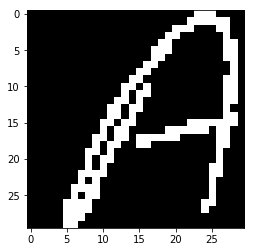

[0.0, 0.14, 0.26, 0.04, 0.37, 0.29, 0.27, 0.04, 0.11]
[[0.24, 0.25, 0.26, 0.57, 0.08999999999999996, 0.0, 0.08000000000000003, 0.010000000000000002, 0.12], [0.47000000000000003, 0.13000000000000003, 0.26, 0.6400000000000001, 0.04999999999999998, 0.02999999999999997, 0.2700000000000001, 0.04000000000000001, 0.21000000000000005]]


In [14]:
import cv2
from cmath import sqrt
import matplotlib.pyplot as plt
img=cv2.imread('/Users/sukhveersingh/Desktop/final_year/final_year/Hand-written-text-recognizer-master/test_set/A/91.jpg',0)
ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")
plt.show()
rows,cols=thresh.shape
density_1=[]
r=0
for j in range(3):
    c=0
    for k in range(3):
        patch=thresh[r:r+10,c:c+10]
        dark=0
        for l in patch:
            for m in l:
                if(m==255):
                    dark+=1
        density_1.append(dark/(rows//3*cols//3))
        c+=10
    r+=10
print(density_1)
count=0
dis=[]
for i in density_all:
    dis.append([abs(sqrt(a-b)**2) for a,b in zip(i[0],density_1)])
print(dis[:2])
    